In [1]:
import numpy as np
import mne
from matplotlib import pyplot as plt 
import os
import load
from paths import paths
import setup
from functions import (start_stop_samples_trigg , start_samples_trigg, add_trial_info_to_events,
    plot_fix_durs_mem_vs,plot_fix_durs_all_phases,closest_tuple,plot_trial, create_full_metadata)

import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
from  plot_general import rose_plot, plot_eye_movements
#%matplotlib qt

# Eye movement behaviour analysis

In [2]:
#info.initialize_logging()
import logging
import datetime
log_filename = 'analysis_' + datetime.datetime.now().strftime('%Y%m%d%H%M%S') + '.log'
#logging.basicConfig(filename=os.path.join(self.log_path, log_filename), level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

log_filename

'analysis_20230527030338.log'

In [6]:
load.subject()


TypeError: subject.__init__() missing 1 required positional argument: 'exp_info'

In [2]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids
#----------parameters-------------
save_ev = True
capturing_thr = 80


for sub_id in [subjects_ids[0]]:
    evts = create_full_metadata(info,sub_id,metadata_path,capturing_thr, save_ev)
    
    



Ｌｏａｄｉｎｇ ＥＥＧ ｄａｔａ．．．．．
        ｓｕｂｊｅｃｔ   Ｓ１０１

Reading /Volumes/DAC1T/Hybrid/Hybrid_preana_out/8.data_analysis/S101_analysis.fdt
Reading 0 ... 1769499  =      0.000 ...  3538.998 secs...


/Users/dac/Documents/repos/MNEdeconv/load.py:225: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['R-AREA', 'R-GAZE-X', 'R-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:225: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:225: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)



Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ１Ｔ/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ｐｒｅａｎａ_ｏｕｔ/９．ｅｖｅｎｔ_ｓｔｒｕｃｔｓ/Ｓ１０１_ｅｖｅｎｔｓ．ｃｓｖ


Ｌｏａｄｉｎｇ ｂｅｈａｖｉｏｕｒａｌ ｄａｔａ．．．．．
            ｆｒｏｍ   [＇１０１_ｈｙｂｒｉｄ_ｓｅａｒｃｈ_ｂｕｉｌｄｅｒ_ｃｏｄｅ_２０２１_Ｎｏｖ_２３_１０２１．ｃｓｖ＇]

percentage of correct answers : 65.2
fixations in cross1 phase : 155

fixations in mem phase    : 2207

fixations in cross2 phase : 484

fixations in vs phase     : 5457

saccade     9956
fixation    9862
cross1       210
mem          210
cross2       210
vs           210
bad_ET       116
Name: type, dtype: int64
total fixations on items    : 4128
fixations on targets  : 270
fixations on distractors  : 3858
percentage of capture fixations in vs 75.6%


In [4]:
evts#plot_trial(eeg,suj,31)
print(evts.columns.tolist())


['type', 'latency', 'urevent', 'duration', 'endtime', 'sac_amplitude', 'sac_endpos_x', 'sac_endpos_y', 'sac_startpos_x', 'sac_startpos_y', 'sac_vmax', 'fix_avgpos_x', 'fix_avgpos_y', 'fix_avgpupilsize', 'sac_angle', 'trial', 'phase', 'mss', 'ontarget', 'ondistractor', 'present', 'correct', 'stm']


In [13]:
#make epochs from fixations in different experimental phases
ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]
#ev_fix = ev_fix.iloc[np.where(ev_fix['latency'].diff()>50)] #limit overlap
event = [ (np.int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]
epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,
                    preload=True)
#epochs.plot_drop_log()




Not setting metadata
1597 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1597 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_86321/1182897004.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  event = [ (np.int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]


2 bad epochs dropped


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa

#epochs['1'].plot_image(picks='B9', combine='mean')
mne.viz.plot_alignment(eeg.info,eeg='original')

In [1]:
%matplotlib inline
#%matplotlib qt
evoked = epochs.average(picks=range(128))
# Plot the average response for each channel in the same figure
evoked.plot(spatial_colors=True, gfp=True)

NameError: name 'epochs' is not defined

In [6]:
np.where(ev_fix['latency'].diff()>80)

NameError: name 'ev_fix' is not defined

In [12]:
#check duration of each phase , make function to see all the results as a df
xstar_samp, xstop_samp = start_stop_samples_trigg(evts,'cross1')
(xstop_samp-xstar_samp)/500


array([0.75 , 0.75 , 0.75 , 0.752, 0.75 , 0.752, 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.752, 0.75 , 0.75 ,
       0.75 , 0.752, 0.75 , 0.75 , 0.752, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.752, 0.752, 0.75 , 0.75 , 0.752, 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.752, 0.752, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.752, 0.752, 0.752, 0.75 , 0.75 , 0.714,
       0.75 , 0.632, 0.746, 0.642, 0.71 , 0.696, 0.582, 0.66 , 0.558,
       0.642, 0.57 , 0.626, 0.532, 0.592, 0.51 , 0.556, 0.47 , 0.402,
       0.386, 0.474, 0.38 , 0.432, 0.324, 0.414, 0.326, 0.384, 0.308,
       0.338, 0.256, 0.322, 0.154, 0.184, 0.206, 0.104, 0.22 , 0.102,
       0.144, 0.15 , 0.058, 0.036, 0.142, 0.032, 0.002, 0.042, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.   , 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002,

In [11]:
#epochs.plot_image(picks=range(128), combine='gfp')

In [10]:
eeg.annotations

<Annotations | 20144 segments: 250 (210), bad_ET (116), fixation (9862), ...>

In [79]:
is_close_to_any_point(point[0], point[1], tuples, threshold)

(True, array([0]))

In [11]:
eeg.plot_sensors(ch_type='eeg', axes=ax2d)

NameError: name 'eeg' is not defined

In [1]:
#pp[~( presents[:-1]==keyRight)]
#cmp_shelves_108_teddybear_021.jpg
#cmp_building_057_dog_014.jpg
#REMEMBER CORR ANS IS WRONG FOR THIS TWO
#and 
#Dog1962 T and cmp_meadow_001_dog_001 IT IS NOT target present I mean , the presumed target is not present in the imagesearch
#it should be hardcoded as Absent condition always

In [4]:
paths().results_path()
info = setup.exp_info()


In [9]:
info.subjects_ids

['S101',
 'S102',
 'S103',
 'S104',
 'S105',
 'S106',
 'S107',
 'S108',
 'S109',
 'S110',
 'S111',
 'S112',
 'S113',
 'S114',
 'S115',
 'S116',
 'S117',
 'S118',
 'S119']

In [6]:
evts = add_trial_info_to_events(evts,bh_data,100)


percentage of correct answers : 65.2
fixations in cross1 phase : 155

fixations in mem phase    : 2207

fixations in cross2 phase : 484

fixations in vs phase     : 5457

saccade     9956
fixation    9862
cross1       210
mem          210
cross2       210
vs           210
bad_ET       116
Name: type, dtype: int64
total fixations on items    : 4663
fixations on targets  : 303
fixations on distractors  : 4360
percentage of capture fixations in vs 85.4%


NameError: name 'logger' is not defined

In [10]:
logger = logging.getLogger()
logger.info("Percentage of correct answers: %.1f %%", 33)


In [20]:
eeg

<RawEEGLAB | S101_analysis.fdt, 148 x 1769500 (3539.0 s), ~1.95 GB, data loaded>

In [3]:
class eye_movements:
    def __init__(self):
        self.suj = suj.subject_id
        self.metadata_file_path =  os.path.join(paths().full_metadata_path(),f'{suj.subject_id}_full_metadata.csv')
        self.stats = self.Stats()
        self.all_fixations = self.All_fixations
        self.all_saccades = 
    
    def plot(self):
        self.stats.plot(self.all_fixations,self.all_saccades)

    class Stats:
        def __init__(self):
            
            
        def start(self,):
            print("Engine started")
        
        


my_car = Car("Toyota", "Camry")
my_car.start()


Engine started


In [3]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids
#----------parameters-------------
all_fixations = pd.DataFrame()  # Initialize an empty DataFrame
all_saccades = pd.DataFrame()


for sub_id in [subjects_ids[0]]:
    eventos = pd.read_csv(os.path.join(metadata_path,f'{sub_id}_full_metadata.csv'))
    fixations_tmp = eventos[(eventos['type']=='fixation') & (eventos['phase']=='vs')]
    saccades_tmp = eventos[(eventos['type']=='saccade') & (eventos['phase']=='vs')]

    all_fixations = pd.concat([all_fixations, fixations_tmp], ignore_index=True)
    all_saccades  = pd.concat([all_saccades, saccades_tmp], ignore_index=True)


#all_fixations all_saccades
# sac_amplitude
# sac_vmax


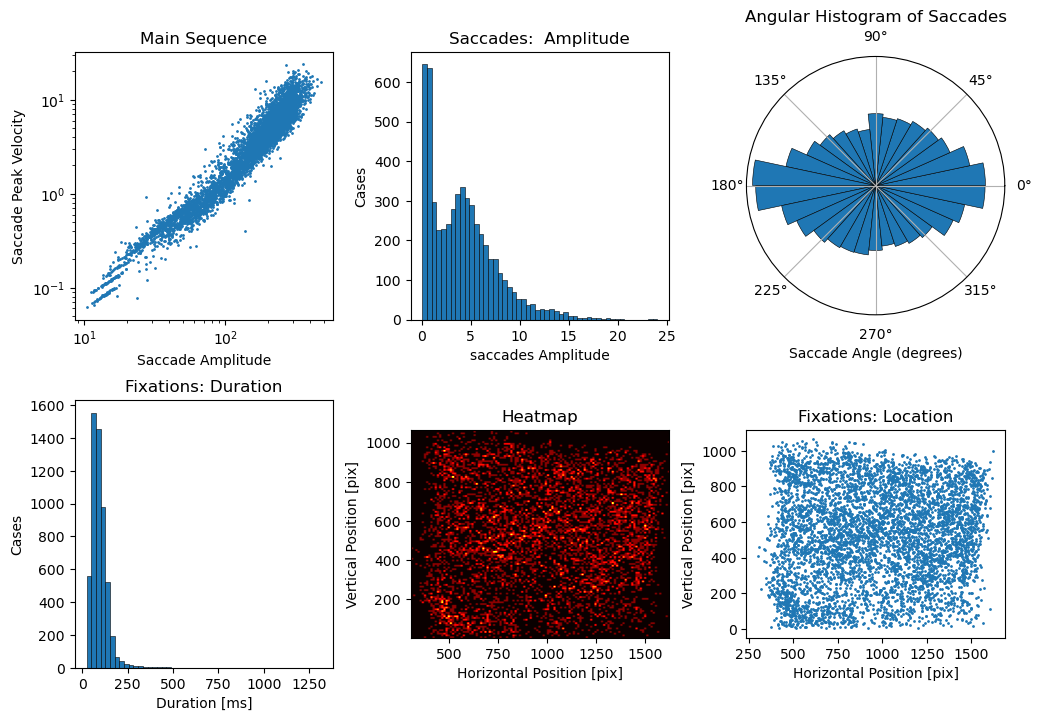

In [4]:
plot_eye_movements(all_fixations,all_saccades)

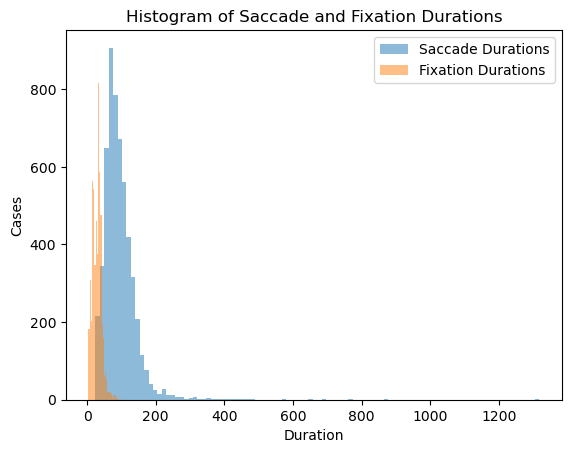

In [10]:
plt.hist(fixations_tmp['duration'], bins=100, alpha=0.5, label='Saccade Durations')
plt.hist(saccades_tmp['duration'], bins=30, alpha=0.5, label='Fixation Durations')

# Adding labels and title
plt.xlabel('Duration')
plt.ylabel('Cases')
plt.title('Histogram of Saccade and Fixation Durations')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [1]:
evts

NameError: name 'evts' is not defined

In [12]:
fix = evts[(evts['type'] == 'fixation') & (eventos['phase']=='vs')]
sac = evts[(evts['type'] == 'saccade') & (eventos['phase']=='vs')]
#print(f"Number of rows with 'fixation': {fixation_count}")
#print(f"Number of rows with 'saccade': {saccade_count}")